### Loan Prediction

In [154]:
import pandas as pd
#Loading the csv data file into a pandas dataframe
df = pd.read_csv(r'C:\Users\elvis\OneDrive\Documents\Python\Loan_Prediction\csv files\train_loan.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
#Dataframe Shape
df.shape

(614, 13)

In [156]:
#Description of Numeric Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [157]:
#Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From above, it is clear that there are some columns with missing values and non-numeric entries. Lets take care of that.

In [158]:
#filling in the missing values of the numeric attributes - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [159]:
#filling the missing values for the categorical attributes- mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Checking for Missing Values

In [160]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Exploratory Data Analysis

<AxesSubplot: xlabel='Property_Area', ylabel='Count'>

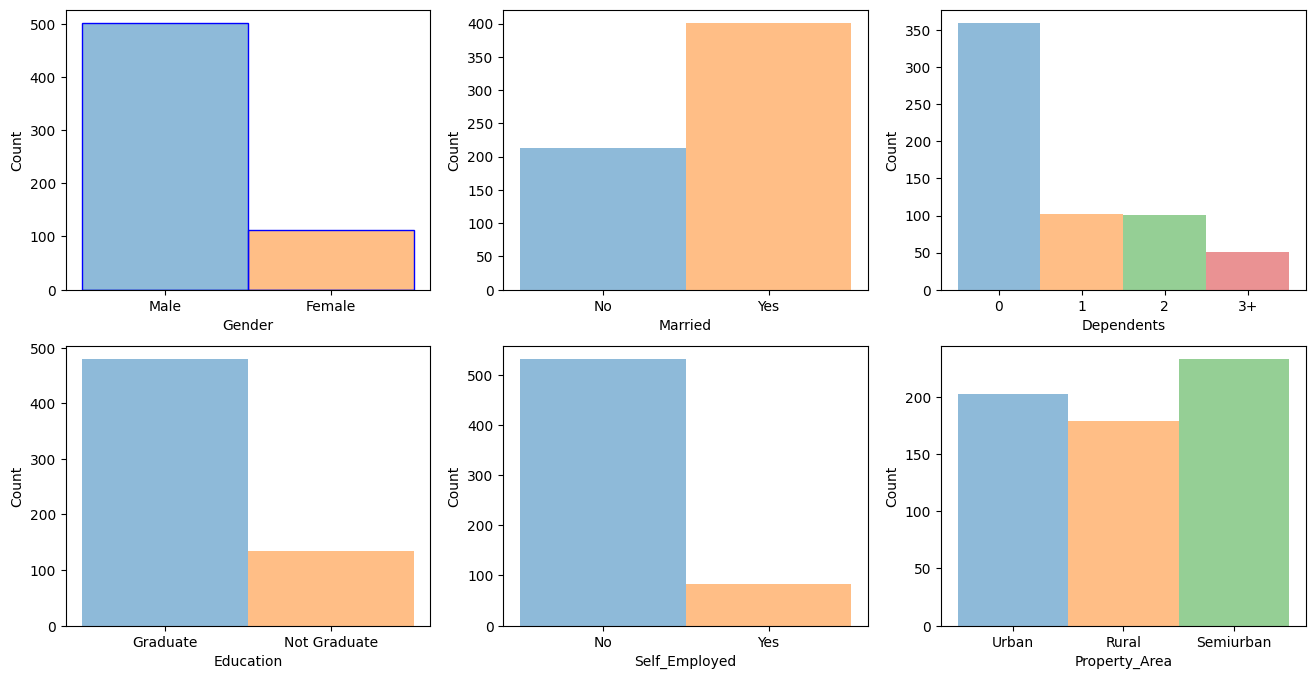

In [161]:
import seaborn as sbn
import matplotlib.pyplot as plt

#Categorical attributes visualization
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))            
sbn.histplot(data=df, x="Gender",hue="Gender", legend=False, ax=axs[0,0],edgecolor='blue')
sbn.histplot(data=df, x="Married",hue="Married", legend=False, ax=axs[0,1],edgecolor='none')
sbn.histplot(data=df, x="Dependents",hue="Dependents", legend=False, ax=axs[0,2],edgecolor='none')
sbn.histplot(data=df, x="Education",hue="Education", legend=False, ax=axs[1,0],edgecolor='none')
sbn.histplot(data=df, x="Self_Employed",hue="Self_Employed", legend=False, ax=axs[1,1],edgecolor='none')
sbn.histplot(data=df, x="Property_Area",hue="Property_Area", legend=False, ax=axs[1,2],edgecolor='none')

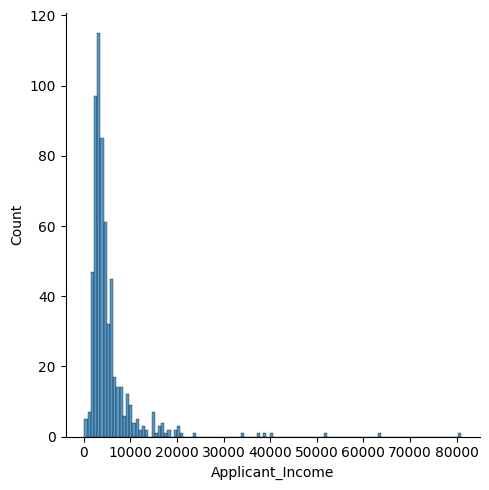

In [162]:
# numerical attributes visualization
sbn.displot(df['Applicant_Income'])

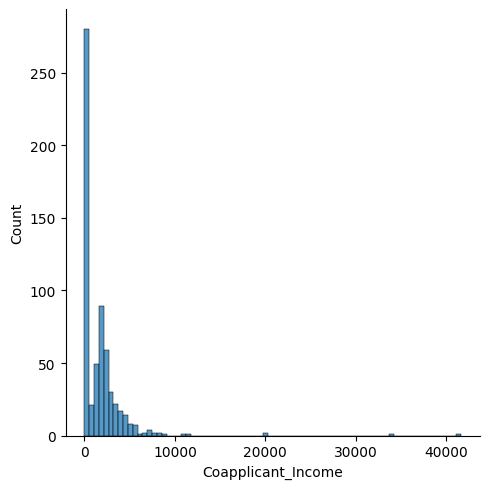

In [163]:
sbn.displot(df['Coapplicant_Income'])

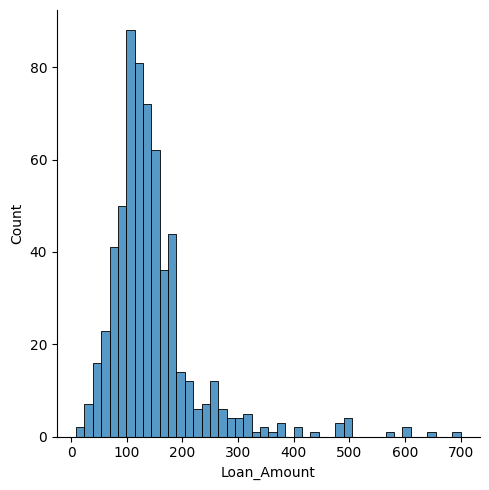

In [164]:
sbn.displot(df['Loan_Amount'])

From the visualizations of the numeric attributes there is evidence that there is skewness in all the numeric attributes and therefore Normalization is required.

Creation of a new Attribute

In [165]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Dropping Non-Informative Columns

In [166]:
df = df.drop(['Loan_ID'],axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Feature Correlation

C:\Users\elvis\AppData\Local\Temp\ipykernel_16128\772658511.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

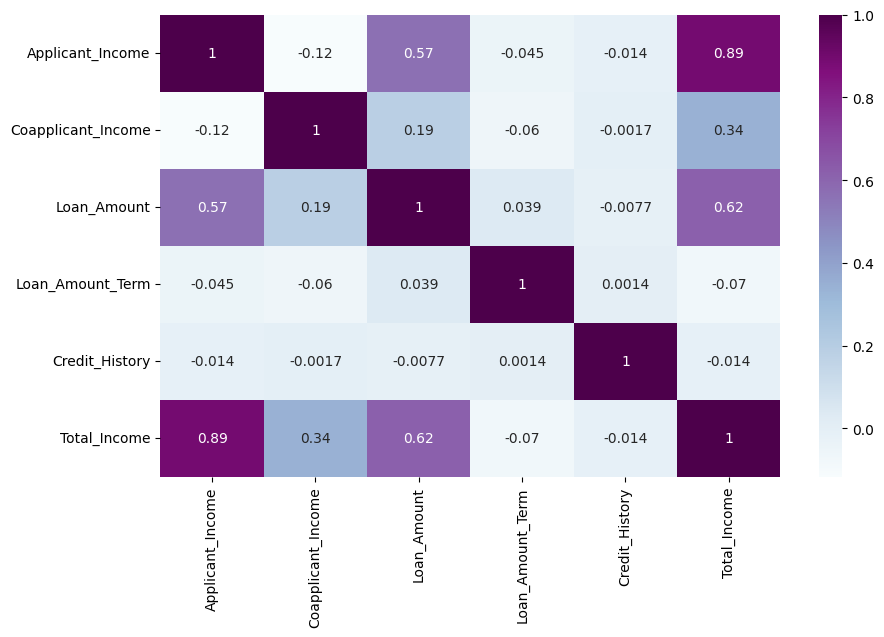

In [167]:
corr = df.corr()
plt.figure(figsize=(10,6))
sbn.heatmap(corr, annot = True, cmap="BuPu")


Label Encoding

In [168]:
from sklearn.preprocessing import LabelEncoder


cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int32  
 1   Married             614 non-null    int32  
 2   Dependents          614 non-null    int32  
 3   Education           614 non-null    int32  
 4   Self_Employed       614 non-null    int32  
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   Loan_Amount_Term    614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Property_Area       614 non-null    int32  
 11  Loan_Status         614 non-null    int32  
 12  Total_Income        614 non-null    float64
dtypes: float64(5), int32(7), int64(1)
memory usage: 45.7 KB


Normalization

Dropping the Labels before Normalization

In [169]:
x = df.drop(['Loan_Status'],axis = 1)
y = df ['Loan_Status']

In [170]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,0.055394
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.058435
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,0.019583
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,0.043980
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,0.057292


Train - Test Split

In [171]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y, test_size=0.3, random_state=1)

In [172]:
#Label summary

from collections import Counter
counter = Counter(y)
print(counter)

Counter({1: 422, 0: 192})


In [173]:
#SVM Classifier

from sklearn import svm
from sklearn.svm import SVC

clf = SVC(probability=True)
model = clf.fit(x_train,y_train)

classifier_score = model.score(x_test,y_test)
print(classifier_score)

0.8162162162162162


In [174]:
y_pred = clf.fit(x_train,y_train).predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [184]:
# An average of 3-fold cross-validation score using an SVC estimator.
import numpy as np
from sklearn.model_selection import cross_val_score
n_folds = 3
cv_error = np.average(cross_val_score(SVC(),x,y,cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.81



[[ 24  34]
 [  0 127]]


<AxesSubplot: >

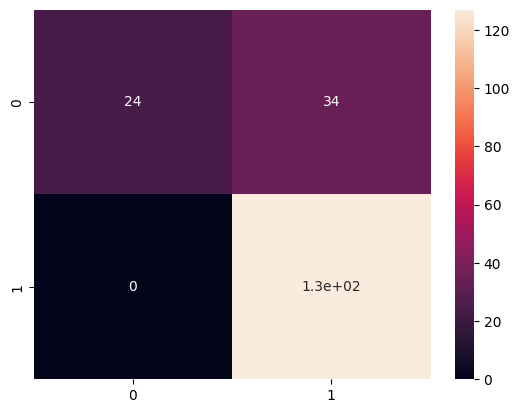

In [176]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
sbn.heatmap(cm,annot=True)

In [177]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,0.413793,0.585366,58.000000
1,0.788820,1.000000,0.881944,127.000000
accuracy,0.816216,0.816216,0.816216,0.816216
macro avg,0.894410,0.706897,0.733655,185.000000
weighted avg,0.855028,0.816216,0.788963,185.000000


Creating Model function to test multiple models and choose the ideal one 

In [178]:
from sklearn.metrics import accuracy_score
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    print(str(model)[:-2],'Accuracy')
    print('Accuracy:',accuracy_score(y_test,y_pred),'\nClassification Report:\n',classification_report(y_test,y_pred),'\nConfusion Matrix: \n', confusion_matrix(y_test,y_pred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model


KNN Hypertuning

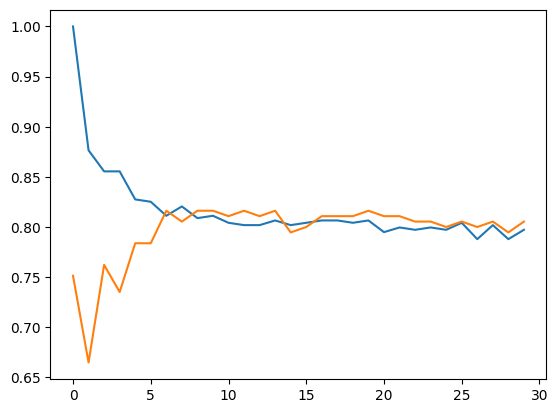

In [179]:
from sklearn.neighbors import KNeighborsClassifier
tr=[]
te=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train=knn.score(x_train,y_train)
    test=knn.score(x_test,y_test)
    
    tr.append(train)
    te.append(test) 

plt.plot(tr)
plt.plot(te)    

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


knn=mymodel(KNeighborsClassifier(n_neighbors=7))
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier(n_neighbors= Accuracy
Accuracy: 0.8162162162162162 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.79      1.00      0.88       127

    accuracy                           0.82       185
   macro avg       0.89      0.71      0.73       185
weighted avg       0.86      0.82      0.79       185
 
Confusion Matrix: 
 [[ 24  34]
 [  0 127]]
Training Accuracy: 0.8111888111888111
Testing Accuracy :0.8162162162162162


SVC Accuracy
Accuracy: 0.8162162162162162 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.79      1.00      0.88       127

    accuracy                           0.82       185
   macro avg       0.89      0.71      0.73       185
weighted avg       0.86      0.82      0.79       185
 
Confusion Matrix: 
 [[ 24  34]
 [  0 127]]
Training Accuracy

In [181]:
lr= LogisticRegression()
lr_model = lr.fit(x_train,y_train)

lr_model_score = lr_model.score(x_test,y_test)
print(lr_model_score)

lr_model_classification_report = classification_report(y_test,y_pred)
print(lr_model_classification_report)

0.8162162162162162
              precision    recall  f1-score   support

           0       1.00      0.41      0.59        58
           1       0.79      1.00      0.88       127

    accuracy                           0.82       185
   macro avg       0.89      0.71      0.73       185
weighted avg       0.86      0.82      0.79       185



The ideal model would then be the Logistic Regression model

In [182]:
#import joblib
#joblib.dump(scaler,'Loan_Prediction_scaler.pkl')

In [183]:
import pickle
model = lr
file = open('LinearRegression.pkl','wb')
pickle.dump(model,file)
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename,'wb'))